<a href="https://colab.research.google.com/github/AdityaNerpagar/TensorFlow_ML_basics/blob/main/ML_Basics_CV5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing and storing Dataset**

In [1]:
#Installing dataset in zip form
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip

--2022-06-01 17:45:25--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.203.128, 172.253.123.128, 142.250.98.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.203.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘horse-or-human.zip’

horse-or-human.zip  100%[===================>] 142.65M   221MB/s    in 0.6s    

2022-06-01 17:45:25 (221 MB/s) - ‘horse-or-human.zip’ saved [149574867/149574867]



In [2]:
#Unzipping ZIP file

import zipfile

# Unzip the dataset
local_zip = './horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./horse-or-human')
zip_ref.close()

In [6]:
import os

# Directory with our training horse pictures
train_horse_dir = os.path.join('./horse-or-human/horses')

# Directory with our training human pictures
train_human_dir = os.path.join('./horse-or-human/humans')



train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])

train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

['horse39-4.png', 'horse28-6.png', 'horse14-4.png', 'horse12-5.png', 'horse47-6.png', 'horse06-6.png', 'horse12-0.png', 'horse08-5.png', 'horse28-3.png', 'horse23-1.png']
['human07-13.png', 'human10-27.png', 'human01-29.png', 'human08-02.png', 'human12-02.png', 'human13-03.png', 'human07-19.png', 'human08-04.png', 'human16-27.png', 'human06-07.png']


In [4]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

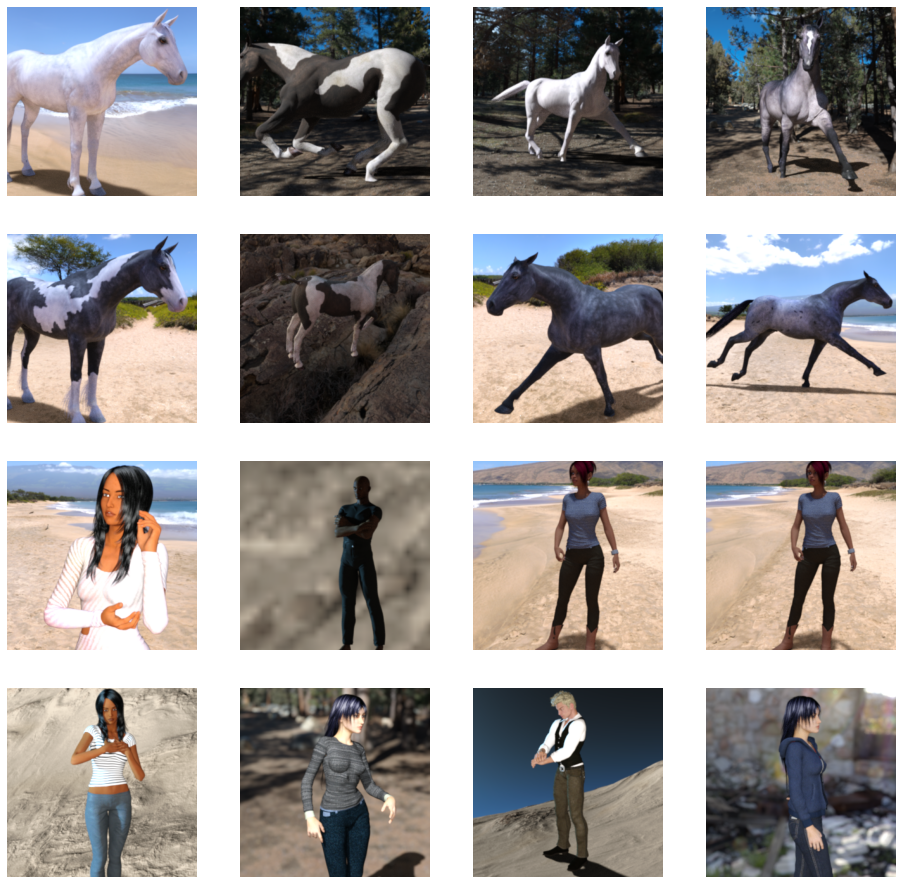

In [7]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname) 
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname) 
                for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


# Creating model from scratch

In [8]:
import tensorflow as tf


In [20]:
model1 = tf.keras.models.Sequential([
                                     # Note the input shape is the desired size of the image 300x300 with 3 bytes color
                                     # The first convolution
                                     tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(300,300,3)),
                                     tf.keras.layers.MaxPooling2D(2,2),
                                     # The Second convolution
                                     tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                                     tf.keras.layers.MaxPooling2D(2,2),
                                     # The Third convolution
                                     tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                     tf.keras.layers.MaxPooling2D(2,2),
                                     # The Fourth convolution
                                     tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                     tf.keras.layers.MaxPooling2D(2,2),
                                     # The Fifth convolution
                                     tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                     tf.keras.layers.MaxPooling2D(2,2),
                                     # Ususal Layers
                                     tf.keras.layers.Flatten(),
                                     tf.keras.layers.Dense(512,activation='relu'),
                                     #Sigmoid function is more efficient in case of binary classification
                                     tf.keras.layers.Dense(1,activation='sigmoid') 
])

In [21]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 149, 149, 16)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 35, 35, 64)      

In [25]:
#train the model with the binary_crossentropy loss because it's a binary 
#classification problem, and the final activation is a sigmoid.
#use the rmsprop optimizer with a learning rate of 0.001
#In this case, using the RMSprop optimization algorithm is preferable to 
#stochastic gradient descent (SGD), because RMSprop automates learning-rate tuning 
#Other optimizers, such as Adam and Adagrad, also automatically adapt the 
#learning rate during training

from tensorflow.keras.optimizers import RMSprop

model1.compile(
    optimizer= RMSprop(learning_rate=0.001),
    loss= 'binary_crossentropy',
    metrics=['accuracy']
)

In [28]:
#data generators that will read pictures in the source folders,
#convert them to float32 tensors, and feed them (with their labels) to the model.
# one generator for the training images and one for the validation images. 
#These generators will yield batches of images of size 300x300 and their labels (binary).
#Then preprocess the images by normalizing the pixel values to be in the [0, 1] 
#range (originally all values are in the [0, 255] range). done using rescale 
#parameter of ImageDataGenerator class 
#This ImageDataGenerator class allows you to instantiate generators of 
#augmented image batches (and their labels) via .flow(data, labels) or .flow_from_directory(directory).


from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255)
train_generator = train_datagen.flow_from_directory(
    './horse-or-human/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 300x300
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')


Found 1027 images belonging to 2 classes.


In [30]:
#training the model
history = model1.fit(
    train_generator,
    steps_per_epoch = 8,
    epochs = 15,
    verbose = 1
)

Epoch 1/15
8/8 [==============================] - 6s 846ms/step - loss: 0.5914 - accuracy: 0.6607
Epoch 2/15
8/8 [==============================] - 6s 727ms/step - loss: 0.6782 - accuracy: 0.7275
Epoch 3/15
8/8 [==============================] - 6s 723ms/step - loss: 0.4149 - accuracy: 0.8387
Epoch 4/15
8/8 [==============================] - 6s 724ms/step - loss: 0.6381 - accuracy: 0.8276
Epoch 5/15
8/8 [==============================] - 6s 839ms/step - loss: 0.2852 - accuracy: 0.8821
Epoch 6/15
8/8 [==============================] - 6s 767ms/step - loss: 0.0958 - accuracy: 0.9644
Epoch 7/15
8/8 [==============================] - 6s 725ms/step - loss: 0.8988 - accuracy: 0.8165
Epoch 8/15
8/8 [==============================] - 6s 718ms/step - loss: 0.1713 - accuracy: 0.9422
Epoch 9/15
8/8 [==============================] - 6s 720ms/step - loss: 0.0695 - accuracy: 0.9778
Epoch 10/15
8/8 [==============================] - 6s 725ms/step - loss: 0.0309 - accuracy: 0.9911
Epoch 11/15
8/8 [==

In [1]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x /= 255
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model1.predict(images, batch_size=10)
  print(classes[0])
    
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")
 

MessageError: ignored

# **Visualize intermediate Representations**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in true_divide


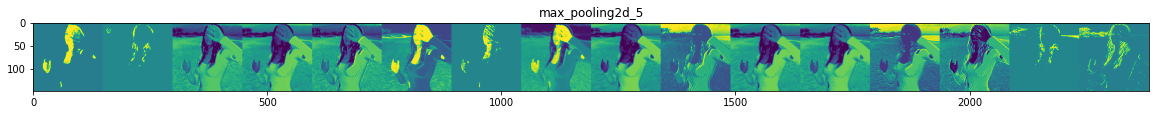

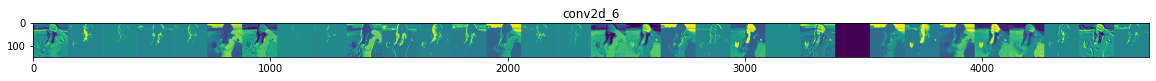

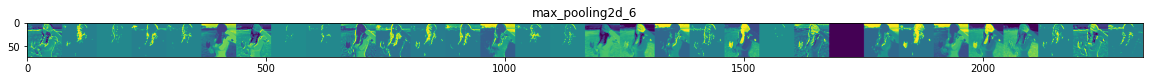

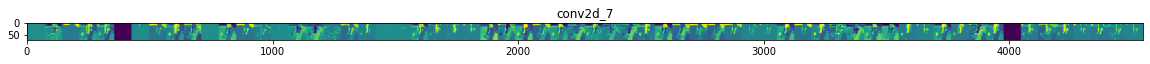

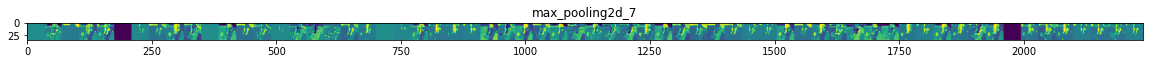

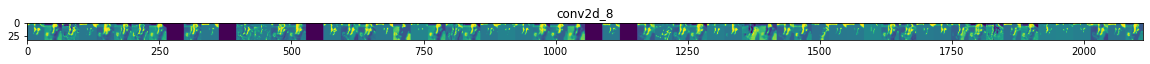

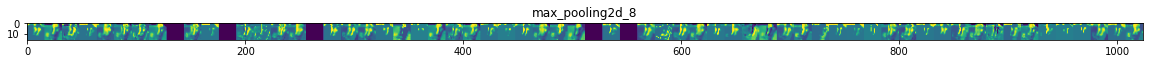

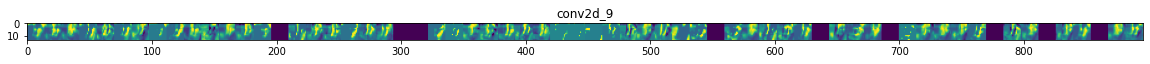

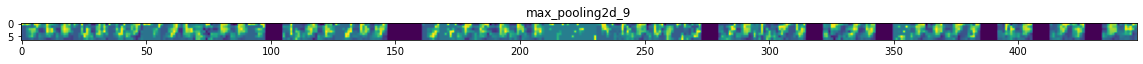

In [35]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model1.layers[1:]]
visualization_model = tf.keras.models.Model(inputs = model1.input, outputs = successive_outputs)

# Prepare a random input image from the training set.
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(300, 300))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (300, 300, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 300, 300, 3)

# Scale by 1/255
x /= 255

# Run the image through the network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so you can have them as part of the plot
layer_names = [layer.name for layer in model1.layers[1:]]

# Display the representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:

    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map

    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    
    # Tile the images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
    
      # Tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

You can see above how the pixels highlighted turn to increasingly abstract and compact representations, especially at the bottom grid.

The representations downstream start highlighting what the network pays attention to, and they show fewer and fewer features being "activated"; most are set to zero. This is called representation sparsity and is a key feature of deep learning. These representations carry increasingly less information about the original pixels of the image, but increasingly refined information about the class of the image. You can think of a convnet (or a deep network in general) as an information distillation pipeline wherein each layer filters out the most useful features.

In [ ]:
import os, signal
os.kill(os.getpid(), signal.SIGKILL)

# **Resources:**

1. https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator
2. https://wikipedia.org/wiki/Sigmoid_function
3. https://www.tensorflow.org/api_docs/python/tf/keras/losses/BinaryCrossentropy
4. https://developers.google.com/machine-learning/crash-course/descending-into-ml/video-lecture
5. https://wikipedia.org/wiki/Stochastic_gradient_descent#RMSProp
6. https://developers.google.com/machine-learning/glossary/#SGD
7. https://wikipedia.org/wiki/Stochastic_gradient_descent#Adam
8. https://developers.google.com/machine-learning/glossary/#AdaGrad
9. https://colab.research.google.com/drive/1os_IKdEjhUdtVv01XWpJw312bracOkXZ#scrollTo=PEkKSpZlvJXA